In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
sns.set()

attendance_df = pd.read_csv('../data/matches_transformed.csv', sep=',')

## Features - Target - Split
X = attendance_df.drop('attendance', axis=1)
y = attendance_df['attendance']

## Test - Train - Split

X_train, X_test, y_train, y_test, = train_test_split(
    X,
    y,
    train_size=2/3, random_state=1234)

In [4]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [6]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

model =  SVR(max_iter=1000)
model.fit(X_train_sc, y_train)
score = model.score(X_test_sc, y_test)
y_pred = model.predict(X_test_sc)
score_mse = mean_squared_error(y_test, y_pred)

print(score, score_mse)

-0.10507850478958258 61824099.23323518


/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=6000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=11000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=16000).  Consider p

1000 -5.31591930932753 61824099.23323518
6000 -0.010008293059430962 61824099.23323518
11000 -0.0017381772340179236 61824099.23323518
16000 -0.0017381772340172574 61824099.23323518
21000 -0.0017381772340170354 61824099.23323518
26000 -0.0017381772340165913 61824099.23323518
31000 -0.0017381772340161472 61824099.23323518
36000 -0.0017381772340159252 61824099.23323518
41000 -0.001738177234015259 61824099.23323518
46000 -0.001738177234015037 61824099.23323518
51000 -0.001738177234014593 61824099.23323518
56000 -0.0017381772340141488 61824099.23323518
61000 -0.0017381772340139268 61824099.23323518
66000 -0.0017381772340134827 61824099.23323518
71000 -0.0017381772340130386 61824099.23323518
76000 -0.0017381772340123725 61824099.23323518
81000 -0.0017381772340121504 61824099.23323518
86000 -0.0017381772340117063 61824099.23323518
91000 -0.0017381772340112622 61824099.23323518
96000 -0.0017381772340110402 61824099.23323518
101000 -0.001738177234010374 61824099.23323518
best_val   =  0
best_sco

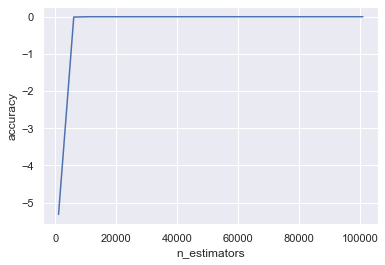

In [25]:
scores = []
scores_mse = []
best_val = 0
best_score = 0
maxIters = np.arange(1000, 102000, 5000)

for maxIter in maxIters:
    model = SVR(kernel='poly', max_iter = maxIter, degree=49)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    score_mse = mean_squared_error(y_test, y_pred)
    scores.append(score)
    scores_mse.append(score_mse)
    if score > best_score:
        best_score = score
        best_val = maxIter
        best_mse = score_mse
    print(maxIter, score, score_mse)

fig = sns.lineplot(x=maxIters, y=scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)
print('best_mse = ', best_mse)

In [28]:
scores = []
scores_mse = []
best_val = 0
best_score = 0
coef0s = np.arange(0, 1, 0.01)

for coef0 in coef0s:
    model = SVR(kernel='poly', max_iter = 50000, degree=30, coef0=coef0)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    score_mse = mean_squared_error(y_test, y_pred)
    scores.append(score)
    scores_mse.append(score_mse)
    if score > best_score:
        best_score = score
        best_val = maxIter
        best_mse = score_mse
    print(coef0, score, score_mse)

fig = sns.lineplot(x=coef0s, y=scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)
print('best_mse = ', best_mse)

/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider

0.0 0.02165017516428236 61824099.23323518
0.01 0.02357292268573663 61824099.23323518
0.02 0.025736630492901202 61824099.23323518
0.03 0.028257667062839387 61824099.23323518
0.04 0.030135435823982037 61824099.23323518
0.05 0.03286111889873 61824099.23323518
0.06 0.03791168140328949 61824099.23323518
0.07 0.04154164695557683 61824099.23323518
0.08 0.043988010495795815 61824099.23323518
0.09 0.045975479262468255 61824099.23323518
0.1 0.04776131808418771 61824099.23323518
0.11 0.04944730977208145 61824099.23323518
0.12 0.05086247363233076 61824099.23323518
0.13 0.053218988210250284 61824099.23323518
0.14 0.05608143898434581 61824099.23323518
0.15 0.05784868269712795 61824099.23323518
0.16 0.061832267524239315 61824099.23323518
0.17 0.06392948549561472 61824099.23323518
0.18 0.06601835924335253 61824099.23323518
0.19 0.06811062012687641 61824099.23323518
0.2 0.06997982585963058 61824099.23323518
0.21 0.07553023531802383 61824099.23323518
0.22 0.07743092882790692 61824099.23323518
0.23 0.079

KeyboardInterrupt: 

In [33]:
model =  SVR(kernel='poly', max_iter = 200000, degree=30, coef0=0.83, gamma='auto')
model.fit(X_train_sc, y_train)
score = model.score(X_test_sc, y_test)
y_pred = model.predict(X_test_sc)
score_mse = mean_squared_error(y_test, y_pred)

print(score, score_mse)

0.6175957432754939 21393773.032848038


/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
